# ACL-ARC pre-process

In [1]:
import pandas as pd
import re
import os
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import *

/home/davialvb/.pyenv/versions/3.12.2/envs/master_degree/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/davialvb/.pyenv/versions/3.12.2/envs/master_degree/lib/python3.12/site-packages/transformers/deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/opt/cuda:/opt/cuda'


In [2]:
import sys
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)

In [3]:
from utils.common import count_words

In [4]:
# Using acl dataset
train = '../data/acl-arc/train.jsonl'
val = '../data/acl-arc/dev.jsonl'
test = '../data/acl-arc/test.jsonl'

In [5]:
df_train= pd.read_json(path_or_buf=train, lines=True)
df_dev = pd.read_json(path_or_buf=val, lines=True)
df_test = pd.read_json(path_or_buf=test, lines=True)

In [6]:
df_train.intent = df_train.intent.str.lower()
df_dev.intent = df_dev.intent.str.lower()
df_test.intent = df_test.intent.str.lower()

In [7]:
df_train.text = df_train.text.str.lower()
df_dev.text = df_dev.text.str.lower()
df_test.text = df_test.text.str.lower()

In [8]:
df_test.head()

,text,citing_paper_id,cited_paper_id,citing_paper_year,cited_paper_year,citing_paper_title,cited_paper_title,cited_author_ids,citing_author_ids,extended_context,section_number,section_title,intent,cite_marker_offset,sents_before,sents_after,cleaned_cite_text,citation_id,citation_excerpt_index,section_name
0,resnik ( 1995 ) reported a correlation of r = ...,W06-1104,External_3502,2006,1995,a holistic lexiconbased approach to opinion mi...,using information content to evaluate semantic...,[Philip Resnik],NaN,This correlation coefficient is an upper bound...,6,NaN,compareorcontrast,"[0, 15]","[[{'index': 1, 'word': 'Resnik', 'lemma': 'Res...","[[{'index': 1, 'word': 'Finkelstein', 'lemma':...",@@CITATION reported a correlation of r = .9026...,W06-1104_27,0,experiments
1,similar observation for surface word frequency...,P13-3018,External_90447,2013,1980,a holistic lexiconbased approach to opinion mi...,lexical representation of derivational relation,[D Bradley],NaN,"( Taft , 1975 ) with his experiment on English...",3,NaN,background,"[94, 108]","[[{'index': 1, 'word': 'Similar', 'lemma': 'si...","[[{'index': 1, 'word': 'Later', 'lemma': 'late...",Similar observation for surface word frequency...,P13-3018_2,0,related work
2,but their importance has grown far beyond mach...,J10-3007,N01-1026,2010,2001,a holistic lexiconbased approach to opinion mi...,inducing multilingual pos taggers and np brack...,"[David Yarowsky, Grace Ngai]",NaN,"MT system combination ( Matusov , Ueffing , an...",1,NaN,motivation,"[124, 146]","[[{'index': 1, 'word': 'But', 'lemma': 'but', ...","[[{'index': 1, 'word': 'IBM', 'lemma': 'IBM', ...",But their importance has grown far beyond mach...,J10-3007_37,0,introduction
3,previous sentiment-analysis work in different ...,W06-1639,W06-3808,2006,2006,a holistic lexiconbased approach to opinion mi...,seeing stars when there aren’t many stars grap...,"[A B Goldberg, J Zhu]",NaN,Relationships between the unlabeled items Carv...,6,NaN,background,"[154, 177]","[[{'index': 1, 'word': 'Previous', 'lemma': 'p...","[[{'index': 1, 'word': 'inter-document', 'lemm...",Previous sentiment-analysis work in different ...,W06-1639_18,0,related work
4,"however , the method we are currently using in...",J92-1004,H91-1014,1992,1991,a holistic lexiconbased approach to opinion mi...,development and preliminary evaluation of the ...,"[S Seneff, J Glass, D Goddeau, D Goodine, L Hi...",NaN,Exactly how to get from the parse tree to an a...,3,NaN,uses,"[65, 83]","[[{'index': 1, 'word': 'However', 'lemma': 'ho...","[[{'index': 1, 'word': 'We', 'lemma': 'we', 'a...","However , the method we are currently using in...",J92-1004_16,0,None


In [9]:
all_acl = pd.concat([df_train, df_test, df_dev])

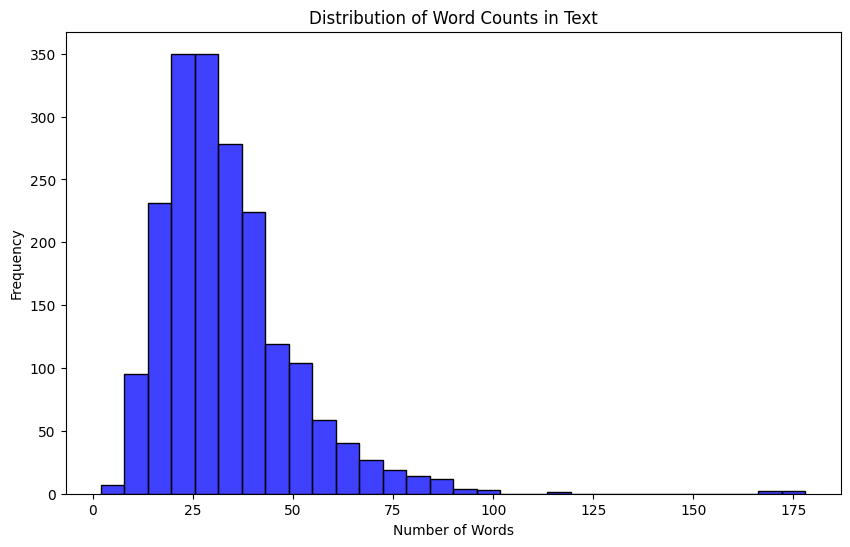

In [10]:
all_acl['word_count'] = all_acl['text'].apply(count_words)

plt.figure(figsize=(10, 6))
sns.histplot(all_acl['word_count'], bins=30, kde=False, color='blue')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Text')

plt.show()

In [11]:
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_uncased')

Could not locate the tokenizer configuration file, will try to use the model config instead.
loading configuration file config.json from cache at /home/davialvb/.cache/huggingface/hub/models--allenai--scibert_scivocab_uncased/snapshots/24f92d32b1bfb0bcaf9ab193ff3ad01e87732fc1/config.json
Model config BertConfig {
  "_name_or_path": "allenai/scibert_scivocab_uncased",
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.42.4",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31090
}

loading file vocab.txt from cache at /home/davialvb/.cache/huggingface/hub/models--allenai--scibert_scivocab_uncased/s

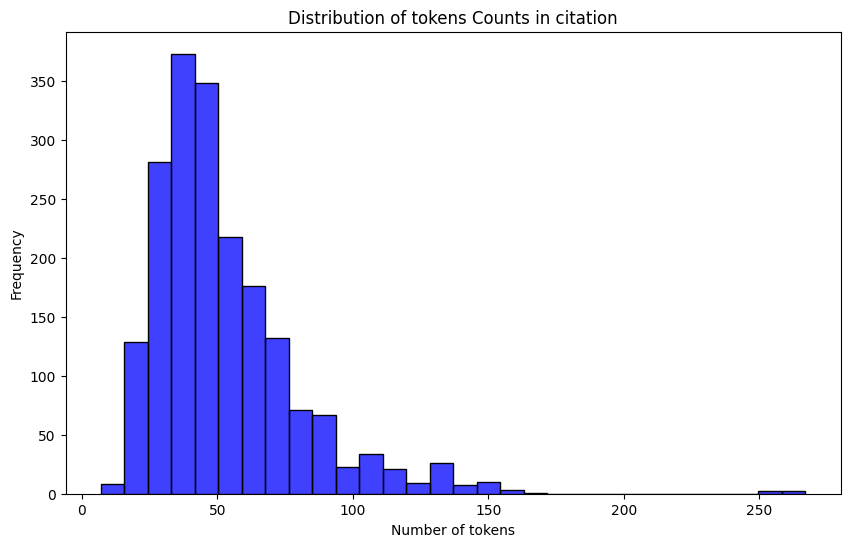

In [12]:
all_acl['bert_token_cont'] = all_acl['text'].apply(lambda x: len(tokenizer.encode_plus(x).get('input_ids')))

plt.figure(figsize=(10, 6))
sns.histplot(all_acl['bert_token_cont'], bins=30, kde=False, color='blue')

plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.title('Distribution of tokens Counts in citation')

plt.show()

In [13]:
all_acl.bert_token_cont.describe()

count    1941.000000
mean       52.438434
std        27.191265
min         7.000000
25%        34.000000
50%        46.000000
75%        63.000000
max       267.000000
Name: bert_token_cont, dtype: float64

In [16]:
all_acl.word_count.describe()

count    1941.000000
mean       33.523957
std        16.828825
min         2.000000
25%        22.000000
50%        30.000000
75%        41.000000
max       178.000000
Name: word_count, dtype: float64

In [17]:
df_train.shape, df_test.shape

((1688, 20), (139, 20))

In [19]:
# String with citation, ACL intent and ACL intent converted to SCICITE type
df_train[['text', 'section_name', 'intent']].to_csv('../data/gan_bert_data/labeled_acl.csv', index=False)
df_dev[['text', 'section_name', 'intent']].to_csv('../data/gan_bert_data/unlabeled_acl.csv', index=False)
df_test[['text', 'section_name', 'intent']].to_csv('../data/gan_bert_data/test_acl.csv', index=False)